| Problem | Formula|Search Domain|
|---      |----    |----|
|Kur1|${\text{Min}}={\begin{cases}f_{1}\left(x_1,x_2,....,x_n\right)=\sum_{i=1}^{n-1}-10exp^{-0.2\sqrt{x^2_{i}+x^2_{i+1}}}\\f_{2}\left(x_1,x_2,....,x_n\right)=\sum^{n}_{i=1}\|x_i\|^{0.8}+5sinx_i^3\\\end{cases}}$|$-5.05\leq{x_i}\leq{5}, i=1..n$|




In [184]:
import time 
import xlsxwriter
from pymoo.indicators.hv import Hypervolume
from pymoo.factory import get_performance_indicator
from pymoo.indicators.igd_plus import IGDPlus
import sys,os 
from PIL import Image               # to load images
from IPython.display import display # to display images
import pandas as pd 
import pandas as pd 
import numpy as np, os ,sys 
from matplotlib import pyplot as plt 
ref_point = None
pf = None
def calculate_hv(result):
    path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())),result['path'])
    F = np.loadtxt(path)
    nadir_point = np.max(F,axis=0)
    metric = Hypervolume(nds=True,ref_point = ref_point,norm_ref_point=False)
    igd_plus = IGDPlus(pf,zero_to_one=False)
    start_time = time.time()
    hv = metric.do(F)
    igd_plus = igd_plus.do(F)
    exc_time = time.time() - start_time
    return [hv,igd_plus,exc_time]
def hv_result(result):
    get = result.apply(calculate_hv, axis=1)
    df = pd.DataFrame(get.tolist(), columns = ['hv','igd_plus','hv_exc_time'])
    final_result = pd.concat([result, df],axis=1)
    #final_result.loc[:,'nadir_point'] =  list(nadir_arr)
    final_result.loc[:,'ref_point'] = str(ref_point)
    final_result = final_result[['Problem', 'Objectives', 'n_variables', 'pf_shape', 
            'hv', 'igd_plus','nadir_point', 
            'data_point_shape', 
            'path', 'image_location', 
            'hv_exc_time', 'ref_point']]
    print(f'ref_point is {ref_point}')
    return final_result
cdir =os.getcwd()
pd.set_option('display.float_format', lambda x : "%.7f" % x)

# Kursawe problem 
## - (#variables / #objectives)
## - 2/2
## - 3/2
## - 4/2
## - 5/2
 - `#PBS -l ncpus=4,mem=16GB`
 - `#PBS -l walltime=10:00:00`
 - `#PBS -q normal`

## Parameter list 
- do for a in nsga2 nsga3 agnomen rnsga2 `algorithm list`
- do for n_gen in 100 200 500 1000    `iterations`
- do for pop in 40 100 200            `population size`

In [185]:

pd.set_option('display.max_rows', None)
folder = os.path.dirname(os.getcwd())
folder_2 = os.path.dirname(folder)
folder_2
filename = 'Random_Search_Result'
path = os.path.join(folder, filename)

result = pd.read_csv(path)
result['path'] = result['path'].str[39:]
result['image_location'] = result['image_location'].str[39:]
result = result.drop(columns=['xl','xu'])
result = result.loc[result['Problem']=='KUR1'].reset_index(drop=True)

print(f"The number of records {len(result)}")

The number of records 52


In [188]:
def nadir_get(result_cc):
    path = os.path.join(folder_2,result_cc)
    F = np.loadtxt(path)
    if np.ndim(F) ==1:
        return F
    else: 
        nadir_point = np.max(F,axis=0)
        return nadir_point


result.loc[:,'nadir_point'] = result['path'].apply(nadir_get)

In [187]:
#path and image path indicating location of objective file and visualization file
result.iloc[:,-3:-1].head(5)

,path,image_location
0,Result/Random_Search/KUR1/KUR1_Obj-2_Var-2.43a...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...
1,Result/Random_Search/KUR1/KUR1_Obj-2_Var-2.77c...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...
2,Result/Random_Search/KUR1/KUR1_Obj-2_Var-2.a89...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...
3,Result/Random_Search/KUR1/KUR1_Obj-2_Var-2.df6...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...
4,Result/Random_Search/KUR1/KUR1_Obj-2_Var-2.033...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...


In [190]:
# filter kursawe problem based on number of variables
kur1_2 = result.loc[result['n_variables']==2].reset_index(drop=True) # dimension 2 
kur1_3 = result.loc[result['n_variables']==3].reset_index(drop=True) # dimension 3 
kur1_4 = result.loc[result['n_variables']==4].reset_index(drop=True) # dimension 4 
kur1_5 = result.loc[result['n_variables']==5].reset_index(drop=True) # dimension 5

# Kur1 with two variables

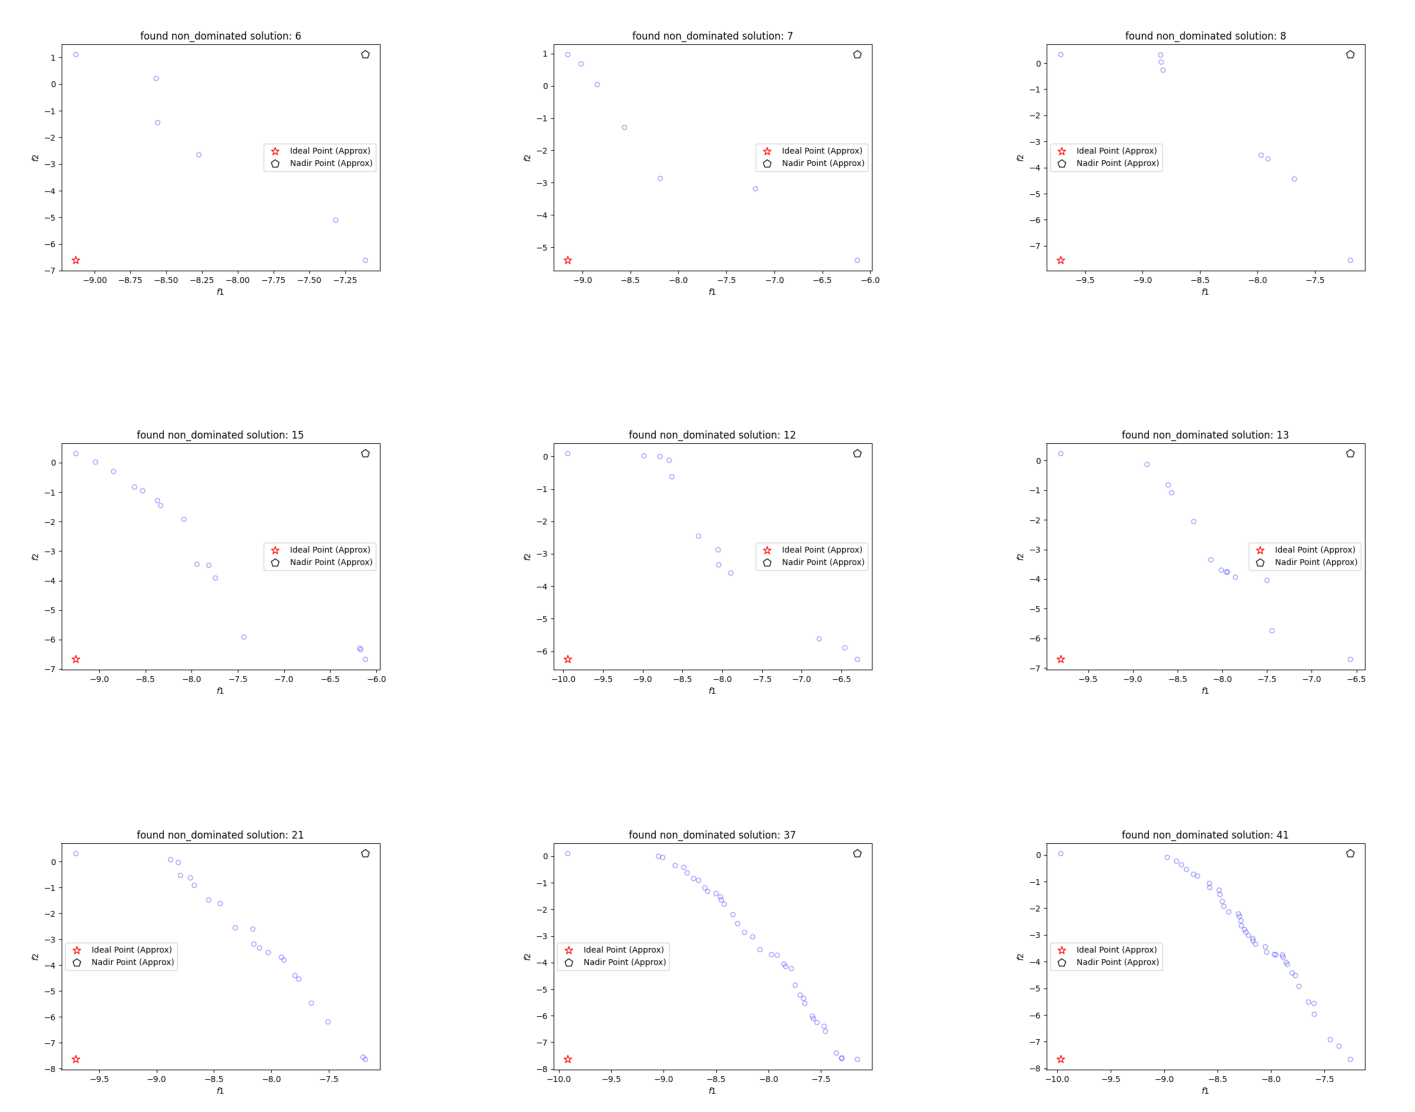

In [191]:
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = kur1_2['image_location'][i]
    path = os.path.join(folder_2,f )+'.png'
    img = Image.open(path)
    plt.axis('off')
    plt.imshow(img)

In [193]:
nadir_arr  = np.array([i for i in np.array(kur1_2['nadir_point'])])
print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0))}')

ref_point = np.array([-6  ,1])
pf = np.loadtxt(os.path.join(folder,'result_factory/Bench/kur1_2_pf' ))
kur1_2_table =hv_result(kur1_2)
kur1_2_table
#kur1_2_table


Global nadir point for kur1 with two variables is :[-6.  1.]
ref_point is [-6  1]


,Problem,Objectives,n_variables,pf_shape,hv,igd_plus,nadir_point,data_point_shape,path,image_location,hv_exc_time,ref_point
0,KUR1,2,2,6,13.9053676,0.5905111,"[-7.10718254151624, 1.1098509964494307]",100,Result/Random_Search/KUR1/KUR1_Obj-2_Var-2.43a...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0014942,[-6 1]
1,KUR1,2,2,7,10.3351204,1.3450044,"[-6.1343220307660555, 0.9672605220468187]",200,Result/Random_Search/KUR1/KUR1_Obj-2_Var-2.77c...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0013871,[-6 1]
2,KUR1,2,2,8,15.8809571,0.2980922,"[-7.191962848573161, 0.32671015330487707]",300,Result/Random_Search/KUR1/KUR1_Obj-2_Var-2.a89...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0014122,[-6 1]
3,KUR1,2,2,15,14.6564389,0.6671074,"[-6.117906394078152, 0.30757600677164293]",500,Result/Random_Search/KUR1/KUR1_Obj-2_Var-2.df6...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0022900,[-6 1]
4,KUR1,2,2,12,13.8184352,0.8669208,"[-6.2993879820726555, 0.08608364939739427]",600,Result/Random_Search/KUR1/KUR1_Obj-2_Var-2.033...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0020180,[-6 1]
5,KUR1,2,2,13,15.7399728,0.5352376,"[-6.566729557001738, 0.23637169840851355]",1000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-2.467...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0022683,[-6 1]
6,KUR1,2,2,21,18.1630271,0.1093821,"[-7.180659674612523, 0.31281267989465755]",3000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-2.10e...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0032372,[-6 1]
7,KUR1,2,2,37,19.0403521,0.0687460,"[-7.153720974788479, 0.09880362926310202]",6000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-2.e3a...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0056751,[-6 1]
8,KUR1,2,2,41,19.1593729,0.0593187,"[-7.2574411914363, 0.04835290631915138]",10000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-2.f00...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0058060,[-6 1]
9,KUR1,2,2,62,19.3161653,0.0433274,"[-7.17826089535213, 0.07259258792924245]",15000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-2.611...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0082948,[-6 1]


In [194]:
nadir_arr  = np.array([i for i in np.array(kur1_2['nadir_point'])])
print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),0)}')

ref_point = np.array([-1, 5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/kur1_2_pf' ))
kur1_2_table_2 = hv_result(kur1_2)
kur1_2_table_2

Global nadir point for kur1 with two variables is :[-6.  1.]
ref_point is [-1  5]


,Problem,Objectives,n_variables,pf_shape,hv,igd_plus,nadir_point,data_point_shape,path,image_location,hv_exc_time,ref_point
0,KUR1,2,2,6,84.4408331,0.5905111,"[-7.10718254151624, 1.1098509964494307]",100,Result/Random_Search/KUR1/KUR1_Obj-2_Var-2.43a...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0027540,[-1 5]
1,KUR1,2,2,7,74.9753987,1.3450044,"[-6.1343220307660555, 0.9672605220468187]",200,Result/Random_Search/KUR1/KUR1_Obj-2_Var-2.77c...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0015962,[-1 5]
2,KUR1,2,2,8,93.5069195,0.2980922,"[-7.191962848573161, 0.32671015330487707]",300,Result/Random_Search/KUR1/KUR1_Obj-2_Var-2.a89...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0017939,[-1 5]
3,KUR1,2,2,15,86.0293523,0.6671074,"[-6.117906394078152, 0.30757600677164293]",500,Result/Random_Search/KUR1/KUR1_Obj-2_Var-2.df6...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0026660,[-1 5]
4,KUR1,2,2,12,85.8354543,0.8669208,"[-6.2993879820726555, 0.08608364939739427]",600,Result/Random_Search/KUR1/KUR1_Obj-2_Var-2.033...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0021491,[-1 5]
5,KUR1,2,2,13,89.5198454,0.5352376,"[-6.566729557001738, 0.23637169840851355]",1000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-2.467...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0024180,[-1 5]
6,KUR1,2,2,21,96.1875338,0.1093821,"[-7.180659674612523, 0.31281267989465755]",3000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-2.10e...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0035460,[-1 5]
7,KUR1,2,2,37,97.9102234,0.0687460,"[-7.153720974788479, 0.09880362926310202]",6000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-2.e3a...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0060282,[-1 5]
8,KUR1,2,2,41,98.3425872,0.0593187,"[-7.2574411914363, 0.04835290631915138]",10000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-2.f00...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0062850,[-1 5]
9,KUR1,2,2,62,98.5673452,0.0433274,"[-7.17826089535213, 0.07259258792924245]",15000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-2.611...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0124319,[-1 5]


In [195]:
pd.concat([kur1_2_table,kur1_2_table_2]).to_excel('Excel/Excel_Random/kur1_2.xlsx', engine = 'xlsxwriter')

# Kur1 with three variables

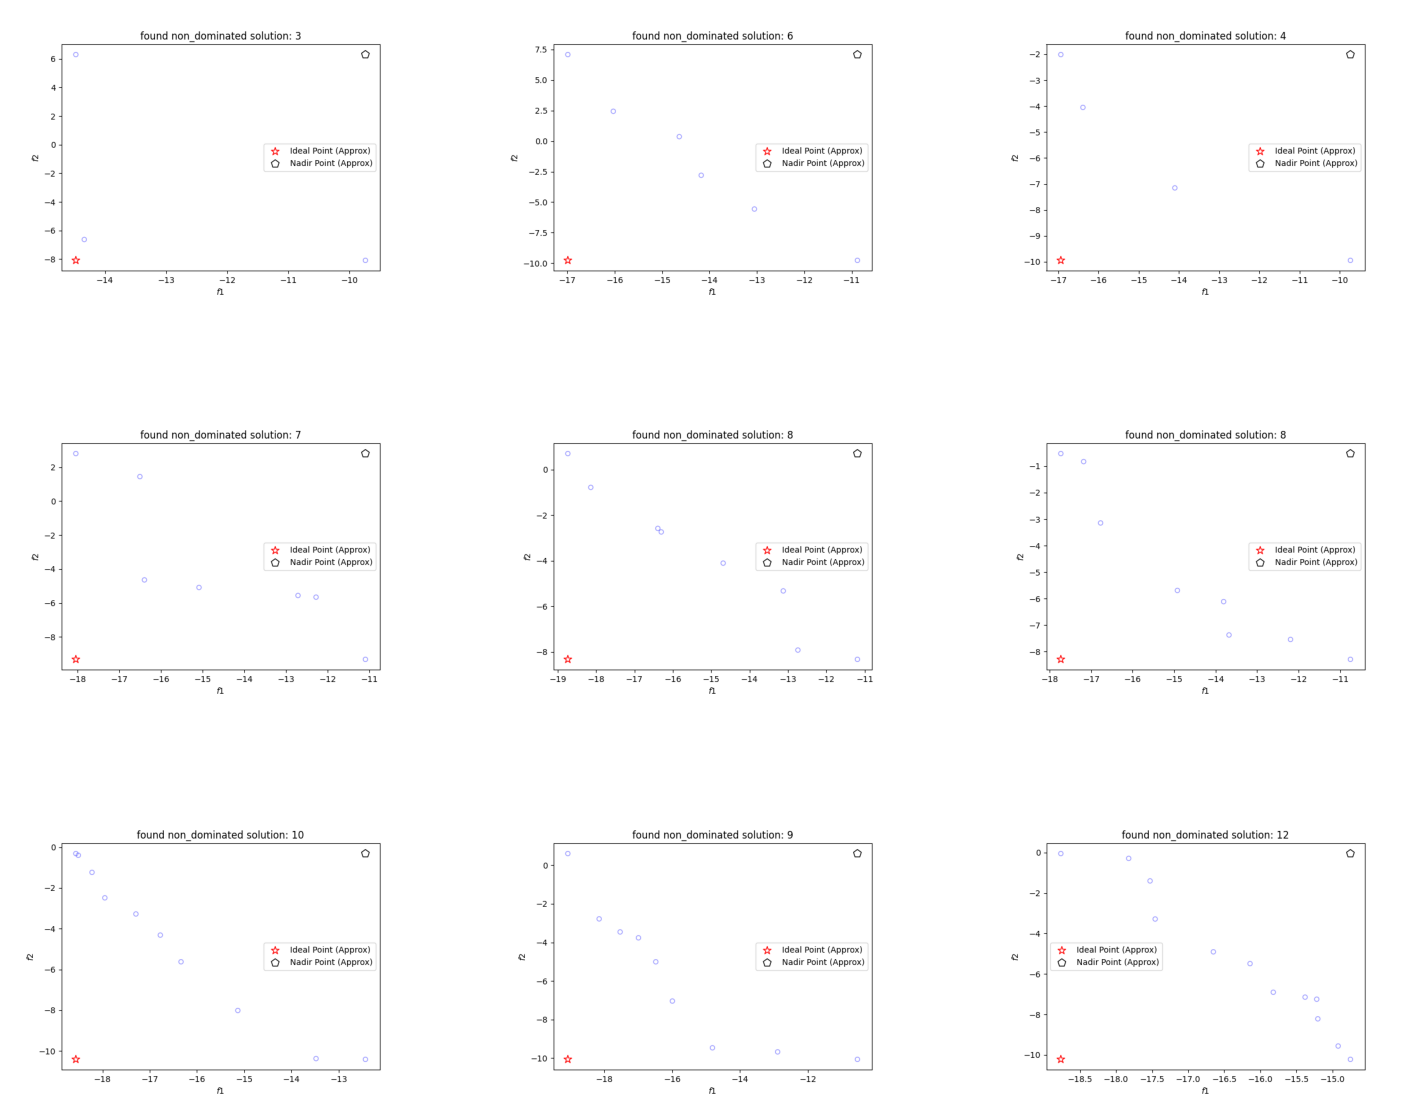

In [196]:
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = kur1_3['image_location'][i]
    path = os.path.join(folder_2,f )+'.png'
    img = Image.open(path)
    plt.axis('off')
    plt.imshow(img)

In [199]:
nadir_arr  = np.array([i for i in np.array(kur1_3['nadir_point'])])
print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),0)}')

ref_point = np.array([-10,7]) #check figure 
pf = np.loadtxt(os.path.join(cdir, 'Bench/kur1_3_pf' ))
kur1_3_table =hv_result(kur1_3)
kur1_3_table

Global nadir point for kur1 with two variables is :[-10.   7.]
ref_point is [-10   7]


,Problem,Objectives,n_variables,pf_shape,hv,igd_plus,nadir_point,data_point_shape,path,image_location,hv_exc_time,ref_point
0,KUR1,2,3,3,59.1959431,3.7095840,"[-9.741681053083376, 6.292934354194964]",100,Result/Random_Search/KUR1/KUR1_Obj-2_Var-3.08c...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0007629,[-10 7]
1,KUR1,2,3,6,62.4699121,3.8981339,"[-10.878435889753694, 7.088000480838869]",200,Result/Random_Search/KUR1/KUR1_Obj-2_Var-3.22e...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0011618,[-10 7]
2,KUR1,2,3,4,88.2550809,2.6974603,"[-9.738891764004302, -2.0129875119579697]",300,Result/Random_Search/KUR1/KUR1_Obj-2_Var-3.3c0...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0009248,[-10 7]
3,KUR1,2,3,7,89.3272967,2.8732366,"[-11.09661284422576, 2.8009418199974485]",500,Result/Random_Search/KUR1/KUR1_Obj-2_Var-3.ac2...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0013781,[-10 7]
4,KUR1,2,3,8,97.3767294,2.7945618,"[-11.189951570637273, 0.7037763347910568]",600,Result/Random_Search/KUR1/KUR1_Obj-2_Var-3.5f8...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0014000,[-10 7]
5,KUR1,2,3,8,95.7107634,2.6042611,"[-10.753049607660145, -0.5270272611086271]",1000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-3.417...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0012379,[-10 7]
6,KUR1,2,3,10,121.8600368,0.9832589,"[-12.432790594927724, -0.31572200510260506]",3000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-3.16f...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0018930,[-10 7]
7,KUR1,2,3,9,125.5844574,1.0076564,"[-10.535737909446754, 0.603938386221765]",6000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-3.8a7...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0015128,[-10 7]
8,KUR1,2,3,12,125.2916496,0.7914577,"[-14.749947964500135, -0.05186457226011887]",10000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-3.f76...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0017800,[-10 7]
9,KUR1,2,3,15,136.2197064,0.4132401,"[-14.615270727141517, 0.39883674678270886]",15000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-3.f6d...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0022311,[-10 7]


In [200]:
ref_point = np.array([-1, 5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/kur1_3_pf' ))
kur1_3_table_2 = hv_result(kur1_3)
kur1_3_table_2

ref_point is [-1  5]


,Problem,Objectives,n_variables,pf_shape,hv,igd_plus,nadir_point,data_point_shape,path,image_location,hv_exc_time,ref_point
0,KUR1,2,3,3,167.8009857,3.7095840,"[-9.741681053083376, 6.292934354194964]",100,Result/Random_Search/KUR1/KUR1_Obj-2_Var-3.08c...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0010476,[-1 5]
1,KUR1,2,3,6,183.3535043,3.8981339,"[-10.878435889753694, 7.088000480838869]",200,Result/Random_Search/KUR1/KUR1_Obj-2_Var-3.22e...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0013289,[-1 5]
2,KUR1,2,3,4,208.1531241,2.6974603,"[-9.738891764004302, -2.0129875119579697]",300,Result/Random_Search/KUR1/KUR1_Obj-2_Var-3.3c0...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0009568,[-1 5]
3,KUR1,2,3,7,202.0851714,2.8732366,"[-11.09661284422576, 2.8009418199974485]",500,Result/Random_Search/KUR1/KUR1_Obj-2_Var-3.ac2...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0013940,[-1 5]
4,KUR1,2,3,8,199.8740858,2.7945618,"[-11.189951570637273, 0.7037763347910568]",600,Result/Random_Search/KUR1/KUR1_Obj-2_Var-3.5f8...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0015371,[-1 5]
5,KUR1,2,3,8,199.8564183,2.6042611,"[-10.753049607660145, -0.5270272611086271]",1000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-3.417...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0014782,[-1 5]
6,KUR1,2,3,10,243.4387780,0.9832589,"[-12.432790594927724, -0.31572200510260506]",3000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-3.16f...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0017951,[-1 5]
7,KUR1,2,3,9,242.9911465,1.0076564,"[-10.535737909446754, 0.603938386221765]",6000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-3.8a7...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0023391,[-1 5]
8,KUR1,2,3,12,244.7237593,0.7914577,"[-14.749947964500135, -0.05186457226011887]",10000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-3.f76...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0028532,[-1 5]
9,KUR1,2,3,15,262.4903488,0.4132401,"[-14.615270727141517, 0.39883674678270886]",15000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-3.f6d...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0022151,[-1 5]


In [201]:
pd.concat([kur1_3_table,kur1_3_table_2]).to_excel('Excel/Excel_Random/kur1_3.xlsx', engine = 'xlsxwriter')

# Kur1 with four variables

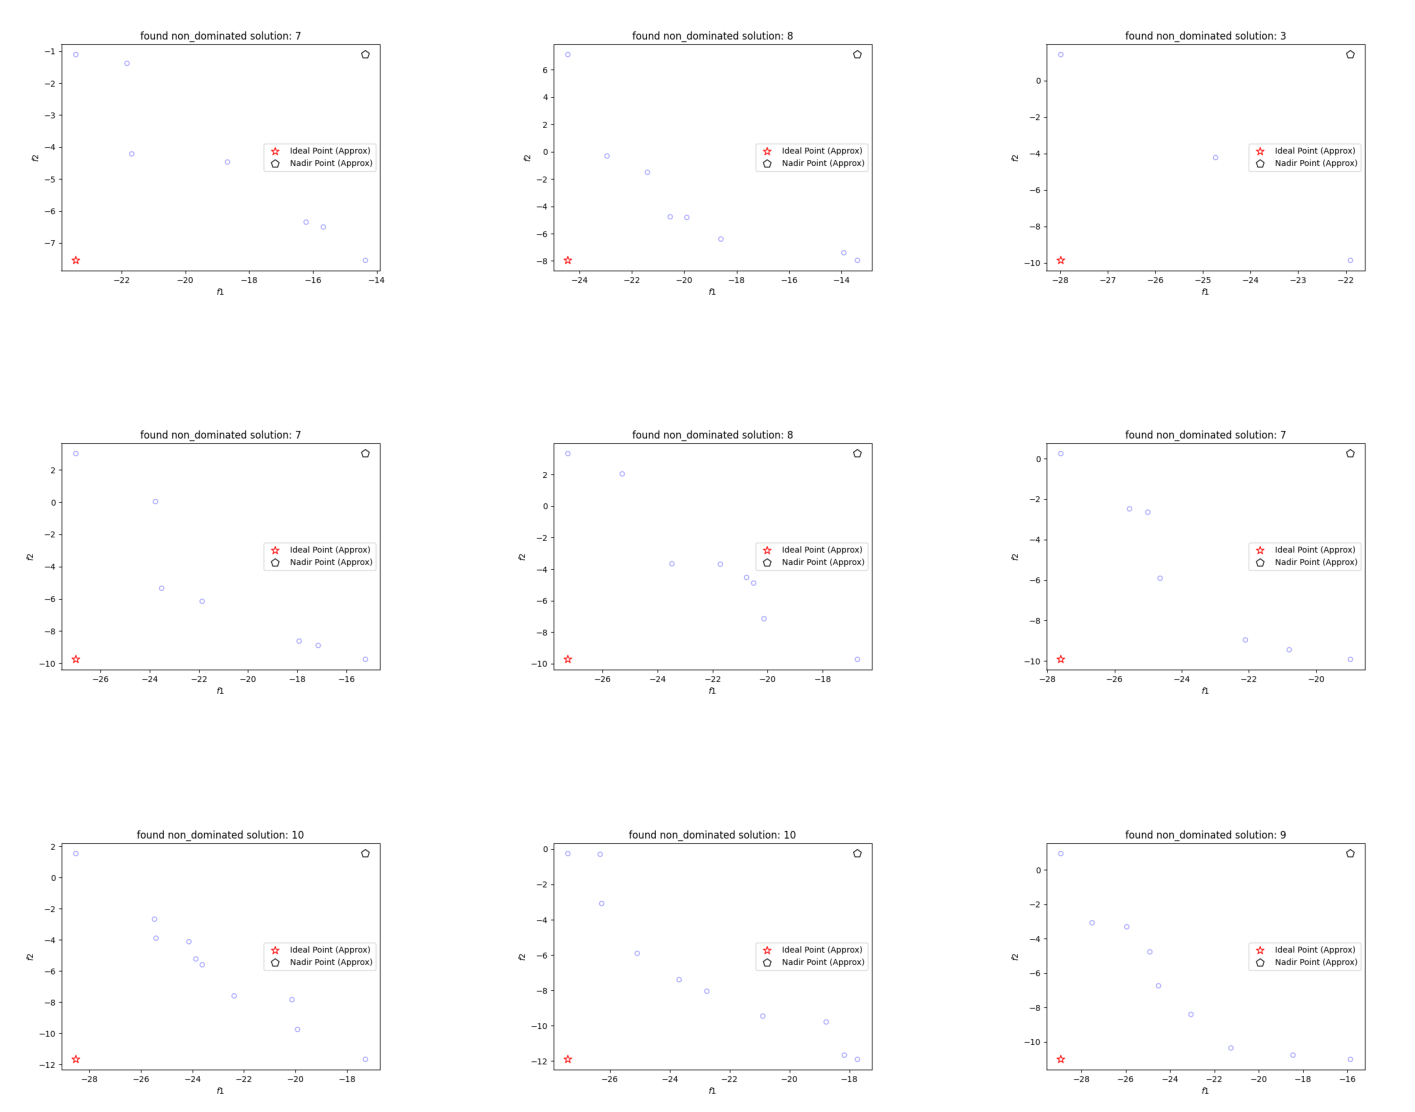

In [202]:
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = kur1_4['image_location'][i]
    path = os.path.join(folder_2,f )+'.png'
    img = Image.open(path)
    plt.axis('off')
    plt.imshow(img)

In [203]:
nadir_arr  = np.array([i for i in np.array(kur1_4['nadir_point'])])
print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),0)}')


ref_point = np.array([-13 ,7])
pf = np.loadtxt(os.path.join(cdir, 'Bench/kur1_4_pf' ))
kur1_4_table = hv_result(kur1_4)
kur1_4_table

Global nadir point for kur1 with two variables is :[-13.   7.]
ref_point is [-13   7]


,Problem,Objectives,n_variables,pf_shape,hv,igd_plus,nadir_point,data_point_shape,path,image_location,hv_exc_time,ref_point
0,KUR1,2,4,7,120.8636395,7.9624883,"[-14.355257255008759, -1.1062267361363232]",100,Result/Random_Search/KUR1/KUR1_Obj-2_Var-4.155...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0010400,[-13 7]
1,KUR1,2,4,8,117.6947761,7.6153305,"[-13.391232169489275, 7.109663873380862]",200,Result/Random_Search/KUR1/KUR1_Obj-2_Var-4.9b9...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0011122,[-13 7]
2,KUR1,2,4,3,200.1299773,3.8168926,"[-21.904006665225857, 1.4292622624029998]",300,Result/Random_Search/KUR1/KUR1_Obj-2_Var-4.07a...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0009160,[-13 7]
3,KUR1,2,4,7,166.8050060,5.8129127,"[-15.224880692535677, 3.0153464708024003]",500,Result/Random_Search/KUR1/KUR1_Obj-2_Var-4.2f3...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0011518,[-13 7]
4,KUR1,2,4,8,163.0883609,5.9319690,"[-16.736202384527424, 3.3272997811237697]",600,Result/Random_Search/KUR1/KUR1_Obj-2_Var-4.f0e...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0023670,[-13 7]
5,KUR1,2,4,7,207.2258007,3.9332429,"[-18.972872474331325, 0.24732125854568723]",1000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-4.d9b...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0011342,[-13 7]
6,KUR1,2,4,10,212.8903325,4.0706535,"[-17.28846457752541, 1.532214454591413]",3000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-4.fd8...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0013080,[-13 7]
7,KUR1,2,4,10,222.2529609,3.4415701,"[-17.729135304329485, -0.25437771613132604]",6000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-4.5a7...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0012789,[-13 7]
8,KUR1,2,4,9,233.6186683,3.1057967,"[-15.862793912516477, 0.9403852446853393]",10000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-4.e0e...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0012641,[-13 7]
9,KUR1,2,4,14,252.4881789,2.1930561,"[-18.6251181604955, 0.28827241466785797]",15000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-4.a83...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0016229,[-13 7]


In [204]:
ref_point = np.array([-1, 5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/kur1_4_pf' ))
kur1_4_table_2 = hv_result(kur1_4)
kur1_4_table_2

ref_point is [-1  5]


,Problem,Objectives,n_variables,pf_shape,hv,igd_plus,nadir_point,data_point_shape,path,image_location,hv_exc_time,ref_point
0,KUR1,2,4,7,250.5351747,7.9624883,"[-14.355257255008759, -1.1062267361363232]",100,Result/Random_Search/KUR1/KUR1_Obj-2_Var-4.155...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0012720,[-1 5]
1,KUR1,2,4,8,253.2880997,7.6153305,"[-13.391232169489275, 7.109663873380862]",200,Result/Random_Search/KUR1/KUR1_Obj-2_Var-4.9b9...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0012810,[-1 5]
2,KUR1,2,4,3,348.6014737,3.8168926,"[-21.904006665225857, 1.4292622624029998]",300,Result/Random_Search/KUR1/KUR1_Obj-2_Var-4.07a...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0007381,[-1 5]
3,KUR1,2,4,7,315.8700055,5.8129127,"[-15.224880692535677, 3.0153464708024003]",500,Result/Random_Search/KUR1/KUR1_Obj-2_Var-4.2f3...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0012012,[-1 5]
4,KUR1,2,4,8,311.2254125,5.9319690,"[-16.736202384527424, 3.3272997811237697]",600,Result/Random_Search/KUR1/KUR1_Obj-2_Var-4.f0e...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0011890,[-1 5]
5,KUR1,2,4,7,357.0921031,3.9332429,"[-18.972872474331325, 0.24732125854568723]",1000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-4.d9b...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0011220,[-1 5]
6,KUR1,2,4,10,381.8966269,4.0706535,"[-17.28846457752541, 1.532214454591413]",3000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-4.fd8...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0014348,[-1 5]
7,KUR1,2,4,10,396.2990271,3.4415701,"[-17.729135304329485, -0.25437771613132604]",6000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-4.5a7...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0014608,[-1 5]
8,KUR1,2,4,9,393.9032225,3.1057967,"[-15.862793912516477, 0.9403852446853393]",10000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-4.e0e...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0017521,[-1 5]
9,KUR1,2,4,14,439.8668436,2.1930561,"[-18.6251181604955, 0.28827241466785797]",15000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-4.a83...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0023508,[-1 5]


In [205]:
pd.concat([kur1_4_table,kur1_4_table_2]).to_excel('Excel/Excel_Random/kur1_4.xlsx', engine = 'xlsxwriter')

# Kur1 with five variables

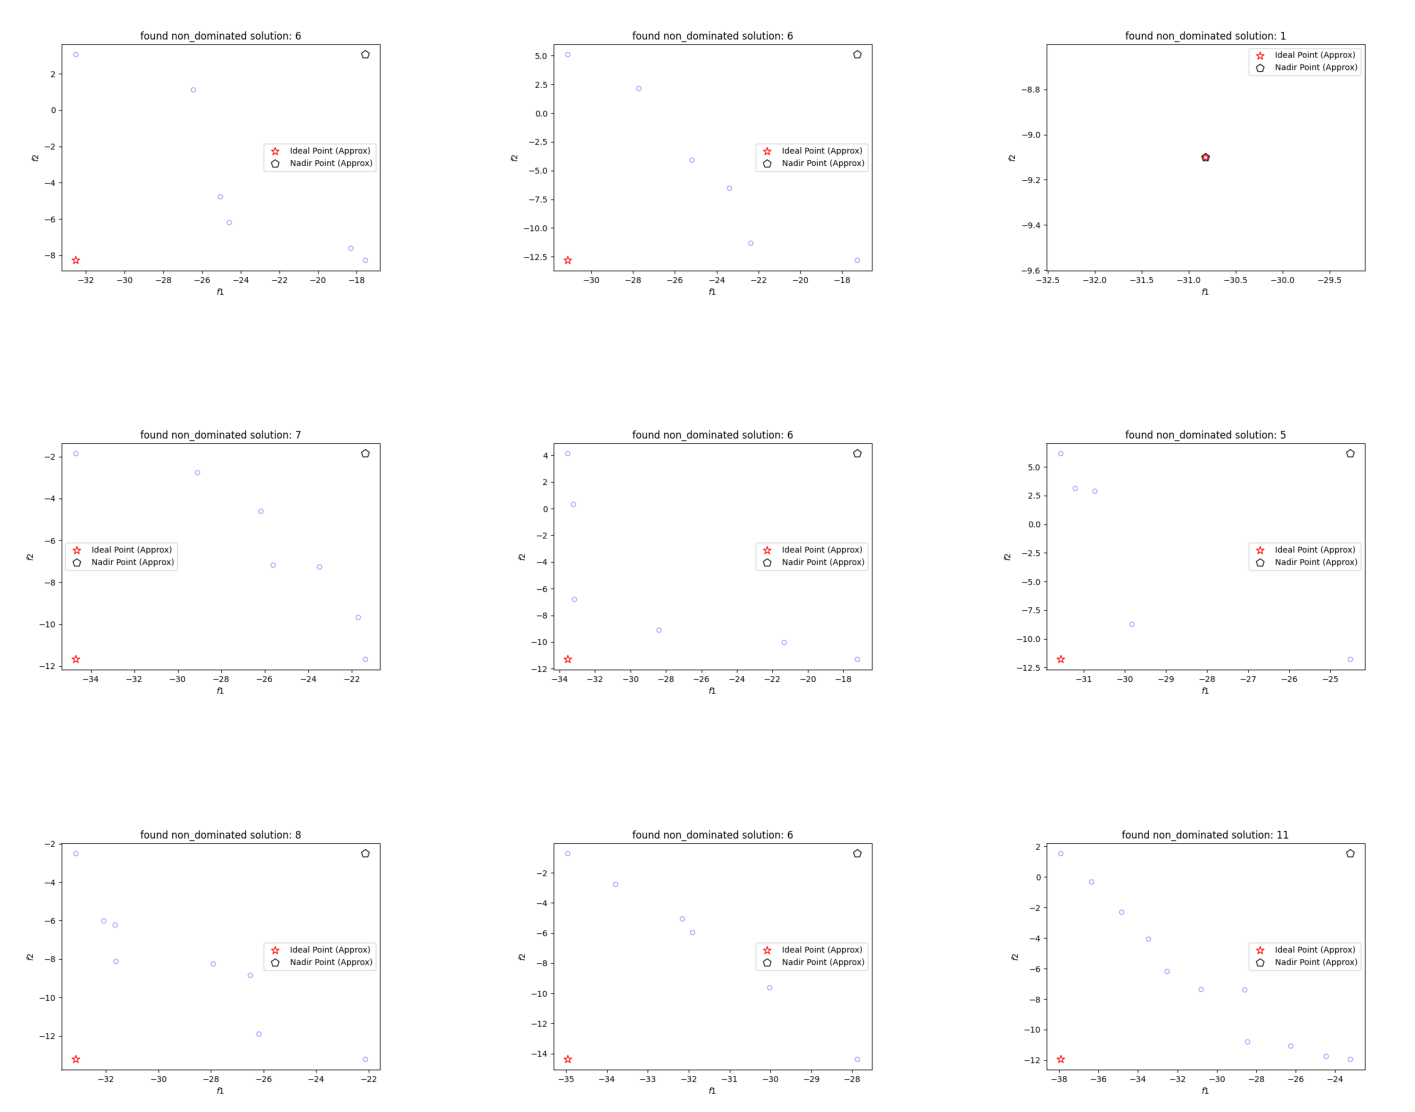

In [206]:
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = kur1_5['image_location'][i]
    path = os.path.join(folder_2,f )+'.png'
    img = Image.open(path)

    plt.axis('off')
    plt.imshow(img)

In [207]:
nadir_arr  = np.array([i for i in np.array(kur1_5['nadir_point'])])
print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),0)}')

ref_point = np.array([-17,6])
pf = np.loadtxt(os.path.join(cdir, 'Bench/kur1_5_pf' ))
kur1_5_table = hv_result(kur1_5)
kur1_5_table

Global nadir point for kur1 with two variables is :[-17.   6.]
ref_point is [-17   6]


,Problem,Objectives,n_variables,pf_shape,hv,igd_plus,nadir_point,data_point_shape,path,image_location,hv_exc_time,ref_point
0,KUR1,2,5,6,124.4030442,11.4157384,"[-17.549630535669426, 3.0541448721196365]",100,Result/Random_Search/KUR1/KUR1_Obj-2_Var-5.989...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0008159,[-17 6]
1,KUR1,2,5,6,137.1840534,10.2281875,"[-17.269614032553715, 5.099876971200204]",200,Result/Random_Search/KUR1/KUR1_Obj-2_Var-5.e05...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0008159,[-17 6]
2,KUR1,2,5,1,208.6909461,7.4139636,"[-30.819325112932507, -9.1013847943748]",300,Result/Random_Search/KUR1/KUR1_Obj-2_Var-5.9e6...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0002680,[-17 6]
3,KUR1,2,5,7,209.5634143,8.4548028,"[-21.358360380370947, -1.8547495366347289]",500,Result/Random_Search/KUR1/KUR1_Obj-2_Var-5.4da...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0008230,[-17 6]
4,KUR1,2,5,6,238.3606742,6.9861812,"[-17.20299212202326, 4.120478376253837]",600,Result/Random_Search/KUR1/KUR1_Obj-2_Var-5.844...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0007789,[-17 6]
5,KUR1,2,5,5,216.1102196,7.2464636,"[-24.503725426918557, 6.159324704847233]",1000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-5.ef6...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0007858,[-17 6]
6,KUR1,2,5,8,262.8071143,5.9711173,"[-22.120859424915622, -2.5171115116738583]",3000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-5.c61...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0009990,[-17 6]
7,KUR1,2,5,6,302.6749651,4.1833527,"[-27.872442517032265, -0.7256145163714316]",6000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-5.835...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0008421,[-17 6]
8,KUR1,2,5,11,290.9471738,5.7638769,"[-23.22726052754525, 1.5340293009724701]",10000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-5.8f4...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0013011,[-17 6]
9,KUR1,2,5,6,318.2815881,4.2419432,"[-24.394871361649045, -2.690313588362775]",15000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-5.c5c...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0009730,[-17 6]


In [208]:
ref_point = np.array([-1, 5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/kur1_5_pf' ))
kur1_5_table_2 = hv_result(kur1_5)
kur1_5_table_2

ref_point is [-1  5]


,Problem,Objectives,n_variables,pf_shape,hv,igd_plus,nadir_point,data_point_shape,path,image_location,hv_exc_time,ref_point
0,KUR1,2,5,6,321.3839365,11.4157384,"[-17.549630535669426, 3.0541448721196365]",100,Result/Random_Search/KUR1/KUR1_Obj-2_Var-5.989...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0013461,[-1 5]
1,KUR1,2,5,6,408.5224385,10.2281875,"[-17.269614032553715, 5.099876971200204]",200,Result/Random_Search/KUR1/KUR1_Obj-2_Var-5.e05...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0011830,[-1 5]
2,KUR1,2,5,1,420.4937777,7.4139636,"[-30.819325112932507, -9.1013847943748]",300,Result/Random_Search/KUR1/KUR1_Obj-2_Var-5.9e6...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0004122,[-1 5]
3,KUR1,2,5,7,458.7589845,8.4548028,"[-21.358360380370947, -1.8547495366347289]",500,Result/Random_Search/KUR1/KUR1_Obj-2_Var-5.4da...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0012732,[-1 5]
4,KUR1,2,5,6,482.6943173,6.9861812,"[-17.20299212202326, 4.120478376253837]",600,Result/Random_Search/KUR1/KUR1_Obj-2_Var-5.844...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0015619,[-1 5]
5,KUR1,2,5,5,470.5989139,7.2464636,"[-24.503725426918557, 6.159324704847233]",1000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-5.ef6...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0009279,[-1 5]
6,KUR1,2,5,8,538.1084592,5.9711173,"[-22.120859424915622, -2.5171115116738583]",3000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-5.c61...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0014021,[-1 5]
7,KUR1,2,5,6,594.9221937,4.1833527,"[-27.872442517032265, -0.7256145163714316]",6000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-5.835...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0010109,[-1 5]
8,KUR1,2,5,11,541.1968739,5.7638769,"[-23.22726052754525, 1.5340293009724701]",10000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-5.8f4...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0015638,[-1 5]
9,KUR1,2,5,6,612.3869632,4.2419432,"[-24.394871361649045, -2.690313588362775]",15000,Result/Random_Search/KUR1/KUR1_Obj-2_Var-5.c5c...,Result/Images/Random_Search/KUR1/KUR1_Obj-2_Va...,0.0010340,[-1 5]


In [183]:
pd.concat([kur1_5_table,kur1_5_table_2]).to_excel('Excel/Excel_Random/kur1_5.xlsx', engine = 'xlsxwriter')